#**ANALISIS TRANSAKSI PENJUALAN KAFE PADA TAHUN 2023**

---

Nama: Rivalio Chendra  
NIM : 2509116039  
Kelas : A

# **IMPORT LIBRARY**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**BUSINESS UNDERSTANDING**

## **Business Objective**

Dataset ini berisi 10.000 transaksi penjualan sebuah kafe pada tahun 2023. Di dalam dataset ini terdapat 8 kolom yaitu Transaction ID, Item, Quantity, Price Per Unit, Total Spent, Payment Method, Location, dan Transaction Date. Dataset ini penuh dengan masalah pada datanya, ada nilai kosong, nilai "ERROR", "UNKNOWN", dan data yang tidak konsisten.


Tujuan analisis bisnis kafe ini adalah untuk memahami pola penjualan kafe sepanjang 2023, produk apa yang paling laris, kapan puncak penjualan terjadi, di mana transaksi paling banyak, dan metode pembayaran apa yang paling sering digunakan. Setelah mengetahui pola maka di harapkan dapat meningkatkan performa penjualan kafe, pendapatan dan efisiensi operasional.

##**Assess Situation**

Terdapat masalah kualitas data yang ditemukan di dataset ini:

-  Beberapa kolom memiliki data yang tidak terisi sama sekali. Seperti di kolom "Location" , dan "Payment Method" kehilangan banyak data. Jika dibiarkan, analisis berbasis dua kolom ini tidak akan akurat
- Ditemukan kata "ERROR" di banyak kolom seperti "Item", "Quantity", "Price Per Unit", "Total Spent", "Payment Method", "Location", dan "Transaction Date". Jika tidak diperbaiki maka akan menghambat proses analisis.
- Selain ERROR, ada juga nilai "UNKNOWN" yang tersebar di kolom-kolom serupa.


Jika data kotor ini langsung digunakan untuk analisis, laporan keuangan bisa keliru, visualisasi akan berantakan, dan keputusan bisnis yang diambil berdasarkan data ini bisa salah arah.

## **Analytic Goals**

Tujuan analitik yang ingin dicapai dari dataset ini adalah:
- Mengidentifikasi produk dengan penjualan tertinggi dan produk yang menghasilkan pendapatan (Total Spent) terbesar.
- Mengetahui metode pembayaran (Cash, Credit Card, Digital Wallet) mana yang paling sering digunakan oleh pelanggan. Ini membantu kafe memutuskan apakah perlu menambah terminal pembayaran tertentu.
- Membandingkan jumlah transaksi In-store vs Takeaway untuk memahami kebiasaan pelanggan dalam mengonsumsi produk kafe.
- Menghitung total pendapatan dan rata-rata pengeluaran per transaksi untuk megetahui kondisi finansial kafe.
- Mengetahui apakah ada korelasi antara Quantity dengan Total Spent.

##**Project Plans**

Rencana pengerjaan dataset ini adalah:
- Membersihkan seluruh data kotor, menangani nilai ERROR dan UNKNOWN, mengisi atau menghapus missing values, memperbaiki tipe data, dan memastikan data siap untuk dianalisis.
- Setelah data bersih, maka mulai menganalisis dan mengolah data untuk menyelesaikan tujuan di analytic goal.
- Memvisualisasikan produk terlaris, penjualan bulanan, perbandingan metode pembayaran, dan lokasi transaksi.
- Membuat insight yang berguna bagi manajemen kafe untuk pengambilan keputusan.
-  Kemudian menarik kesimpulan berdasarkan hasil analisis.


# **DATA UNDERSTANDING**

## **Memuat Dataset**

Dataset ini berisi transaksi penjualan sebuah kafe selama tahun 2023. Data bersumber dari sistem kasir kafe yang mencatat setiap transaksi, namun mengalami masalah kualitas data sehingga data perlu di bersihkan sebelum dapat digunakan.

In [ ]:
file = '/content/drive/MyDrive/DATASET AVD/dirty_cafe_sales.csv'
df = pd.read_csv(file)

df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


Dari tampilan awal dataset, langsung terlihat adanya nilai "ERROR" di kolom "Total Spent", Missing values di "Price Per Unit", "Payment Method", serta "Location Data", dan nilai "UNKNOWN" di kolom 'Payment Method" serta "Location".

## **Deskripsi Data**

### **Informasi Dasar**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


Berdasarkan output di atas, dapat diketahui bahwa dataset ini memiliki 10.000 baris dan 8 kolom.

Semua kolom saat ini bertipe data object, padahal kolom seperti "Quantity", "Price Per Unit", dan "Total Spent" seharusnya bertipe numerik, serta "Transaction Date" harusnya bertipe datetime.

### **Informasi Lanjutan**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


1. Transaction ID: jumlah baris: 10.00 (lengkap), tipe data: object, deskripsi: Kode unik pengenal setiap transaksi, berfungsi sebagai primary key setiap baris data dan tidak memiliki missing values sama sekali.

2. Item: jumlah baris : 9.667 (ada 333 yang kosong), tipe data: object, deskripsi: Nama produk yang dibeli pelanggan.

3. Quantity: jumlah baris: 9.862 (ada 138 yang kosong), tipe data: object, deskripsi: Jumlah item yang dibeli dalam satu transaksi.

4. Price Per Unit: jumlah baris: 9.821 (ada 179 yang kosong), tipe data: object, deskripsi: Harga satuan produk dalam mata uang tertentu.

5. Total Spent: jumlah baris: 9.827 (ada 173 yang kosong), tipe data: object, deskripsi: Total uang yang dikeluarkan pelanggan dalam satu transaksi (Quantity x Price Per Unit).

6. Payment Method: jumlah baris: 7.421 (ada 2.579 yang kosong), tipe data: object, deskripsi: Metode pembayaran yang digunakan pelanggan.

7. Location: jumlah baris: 6.735 (ada 3.265 yang kosong), tipe data: object, deskripsi: Lokasi transaksi, yaitu In-store (makan di tempat) atau Takeaway (dibawa pulang).

8. Transaction Date: jumlah baris: 9.841 (ada 159 yang kosong), tipe data: object, deskripsi    : Tanggal transaksi berlangsung dengan format YYYY-MM-DD.

### **Informasi Statistik Deskriptif**

In [ ]:
df.describe(include='all')

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


Berdasarkan data, total baris transaksi adalah 10.000. Maka dapat disimpulkan:
* Item hilang 333 data (10.000 - 9.667)
* Quantity hilang 138 data (10.000 - 9.862)
* Price Per Unit hilang 179 data (10.000 -9.821)  
* Total Spent hilang 173 data (10.000 - 9.827)
* Payment Method hilang 2.579 data (10.000 - 7.421)
* Location hilang 3.265 data (10.000 - 6.735)
* Transaction Date hilang 159 data (10.000 - 9.841)

Kolom Item, Quantity, Price Per Unit, Total Spent, Payment Method, Location dan Transaction Date mengandung missing values ERROR, dan UNKNOWN , sementara kolom lainnya sudah lengkap (10.000 data)

## **VERIFIKASI KUALITAS DATA**

### **Data Type Check**

Mengecek apakah tipe data setiap kolom sudah sesuai dengan isi datanya. Tipe data yang salah dapat menyebabkan error atau hasil analisis yang keliru.

In [ ]:
df.dtypes

,0
Transaction ID,object
Item,object
Quantity,object
Price Per Unit,object
Total Spent,object
Payment Method,object
Location,object
Transaction Date,object


Seluruh kolom bertipe object, namun harusnya ada kolom-kolom yang bukan bertipe object, anatara lain:
- Quantity: seharusnya int64, karena jumlah barang tidak mungkin desimal.
- Price Per Unit: Seharusnya float, karena ini adalah nilai harga.
- Total Spent: Seharusnya float, karena ini adalah total harga.
- Transaction Date: Seharusnya Datetime, karena isinya adalah tanggal.

### **Incosistent Values**

Nilai tidak konsisten adalah data yang seharusnya memiliki format atau pilihan tertentu, namun malah di isi dengan nilai yang tidak sesuai. Di dalam data ini sendiri terdapat 3 Incosistent Values yaitu "ERROR", "UNKNOWN", dan "nan", ketiga nilai ini bukanlah missing values, namun nilai yang memang sengaja dibuat, oleh karena itu dimasukan ke dalamincosistent Values.

1. **Item**  

Seharusnya hanya berisi nama produk kafe yang valid. Namun ditemukan nilai "ERROR", "nan", dan "UNKNOWN" yang tidak mewakili produk apapun.

In [ ]:
print(df['Item'].unique())

['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'UNKNOWN' 'Sandwich' nan
 'ERROR' 'Juice' 'Tea']


2. **Quantity**

Seharusnya hanya berisi jumlah item yang dibeli. Namun ditemukan nilai "ERROR", "nan", dan "UNKNOWN" yang tidak mewakili jumlah apapun.

In [ ]:
print(df['Quantity'].unique())

['2' '4' '5' '3' '1' 'ERROR' 'UNKNOWN' nan]


3. **Price Per Unit**

Seharusnya hanya berisi harga yang dibeli. Namun ditemukan nilai "ERROR", "nan", dan "UNKNOWN".

In [ ]:
print(df['Price Per Unit'].unique())

['2.0' '3.0' '1.0' '5.0' '4.0' '1.5' nan 'ERROR' 'UNKNOWN']


4. **Total Spent**

Seharusnya hanya berisi total uang yang dibayar pelanggan. Namun ditemukan nilai "ERROR", "nan", dan "UNKNOWN".

In [ ]:
print(df['Total Spent'].unique())

['4.0' '12.0' 'ERROR' '10.0' '20.0' '9.0' '16.0' '15.0' '25.0' '8.0' '5.0'
 '3.0' '6.0' nan 'UNKNOWN' '2.0' '1.0' '7.5' '4.5' '1.5']


5. **Payment Method**

Seharusnya hanya berisi 3 metode pembayaran valid: Cash, Credit Card, Digital Wallet. Namun ditemukan nilai "ERROR", "nan", dan "UNKNOWN".

In [ ]:
print(df['Payment Method'].unique())

['Credit Card' 'Cash' 'UNKNOWN' 'Digital Wallet' 'ERROR' nan]


6. **Location**

Seharusnya hanya berisi 2 nilai valid: In-store dan Takeaway. Namun ditemukan nilai "ERROR", "nan", dan "UNKNOWN".

In [ ]:
print(df['Location'].unique())

['Takeaway' 'In-store' 'UNKNOWN' nan 'ERROR']


7. **Transaction Date**

Seharusnya hanya berisi tanggal pembelian. Namun ditemukan nilai "ERROR", "nan", dan "UNKNOWN".

In [ ]:
print(df['Transaction Date'].unique())

['2023-09-08' '2023-05-16' '2023-07-19' '2023-04-27' '2023-06-11'
 '2023-03-31' '2023-10-06' '2023-10-28' '2023-07-28' '2023-12-31'
 '2023-11-07' 'ERROR' '2023-05-03' '2023-06-01' '2023-03-21' '2023-11-15'
 '2023-06-10' '2023-02-24' '2023-03-25' '2023-01-15' '2023-04-04'
 '2023-03-30' '2023-12-01' '2023-09-18' '2023-06-03' '2023-12-13'
 '2023-04-20' '2023-04-10' '2023-03-11' '2023-06-02' '2023-11-06'
 '2023-08-15' '2023-10-09' '2023-05-28' '2023-07-17' '2023-04-29'
 '2023-06-08' '2023-06-29' '2023-04-17' '2023-12-22' '2023-01-10'
 '2023-10-02' '2023-02-23' '2023-03-22' '2023-11-03' '2023-03-02'
 '2023-06-26' '2023-05-02' '2023-09-05' '2023-01-08' '2023-03-15'
 '2023-11-25' '2023-12-05' '2023-03-19' '2023-06-27' '2023-04-19'
 '2023-10-07' '2023-09-30' '2023-05-27' '2023-11-18' '2023-10-20'
 '2023-10-03' '2023-10-27' '2023-04-06' '2023-01-31' '2023-12-08'
 '2023-06-19' '2023-12-14' '2023-07-16' '2023-02-22' nan '2023-06-15'
 '2023-12-09' '2023-04-18' '2023-10-29' '2023-04-30' '2023-04-02

"ERROR", "nan", dan "UNKNOWN" hampir muncul di semua kolom, oleh karena itu incosistent values ini harus diperbaiki agar dapat digunakan untuk analisi lebih lanjut.

### **Missing Values**

Missing values adalah baris yang benar-benar kosong (tidak ada isinya sama sekali). Perlu dibedakan dengan nilai ERROR/UNKNOWN yang memang diisi teks tertentu.

Pada tahap ini, kita akan melihat seberapa banyak data yang hilang pada seluruh kolom. Dan terlihat bahwa kolom:

- item: Memiliki missing values sekitar 3%.
- Quantity: Memiliki missing values sekitar 1%.
- Price Per Unit: Memiliki missing values sekitar 2%.
- Total Spent: Memiliki missing values sekitar 2%.
- Payment Method: Memiliki missing values sekitar 25%.
- Location: Memiliki missing values sekitar 32%.
- Transaction Date: Memiliki missing values sekitar 1%.

Dapat dilihat hampir semua kolom memiliki missing values, sehingga setiap missing values perlu ditangani atau dihapus untuk kelancaran analisis.

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
Transaction ID,0.00
Item,3.33
Quantity,1.38
Price Per Unit,1.79
Total Spent,1.73
Payment Method,25.79
Location,32.65
Transaction Date,1.59


### **Duplicated Values**

Data duplikat adalah baris yang isinya sama persis dengan baris lain. Pada tahap ini, kita akan mengecek duplikasi pada dataset. Hal ini dilakukan agar dataset memiliki insight dan hasil yang bersih.

In [ ]:
df[df.duplicated()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date


Datataset ini tidak memiliki baris duplikat sama sekali. Jadi hal ini tidak perlu ditangani.

### **Outlier Values**

Outlier adalah nilai yang sangat jauh menyimpang dari nilai data lainnya. Dapat di periksa menggunakan boxplot pada kolom-kolom numerik yang sudah dibersihkan dari ERROR/UNKNOWN.

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Quantity,0.000000
Price Per Unit,0.000000
Total Spent,2.669462


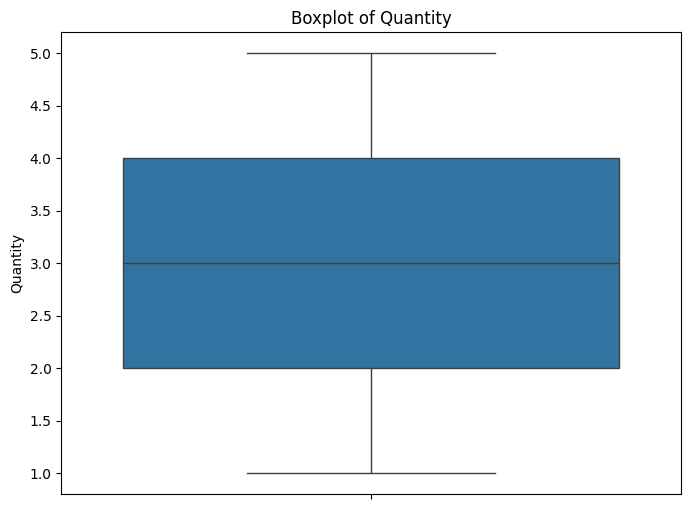

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Quantity'])
plt.title('Boxplot of Quantity')
plt.ylabel('Quantity')
plt.show()

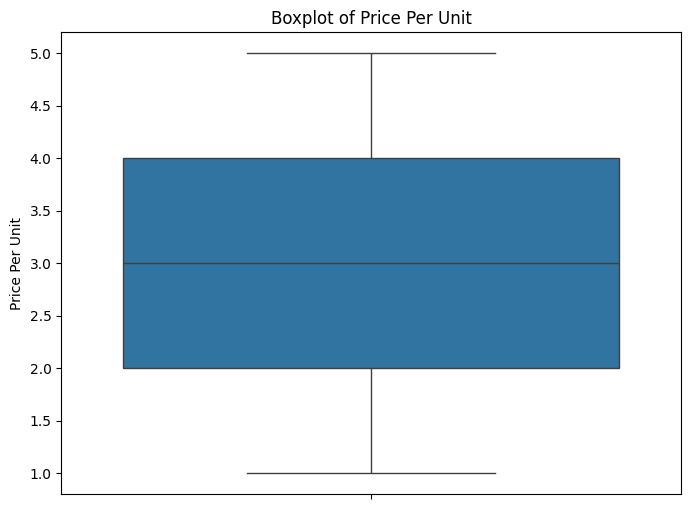

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Price Per Unit'])
plt.title('Boxplot of Price Per Unit')
plt.ylabel('Price Per Unit')
plt.show()

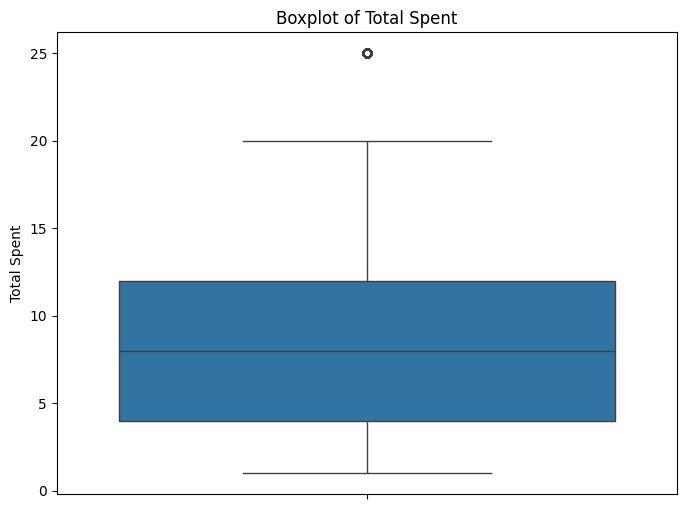

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Total Spent'])
plt.title('Boxplot of Total Spent')
plt.ylabel('Total Spent')
plt.show()

Dapat dilihat ketiga kolom ini memiliki outlier yang masih tergolong normal, dengan:
- Quantity: Presentase 0%.
- Price Per Unit: Presentase 0%.
- Total Spent : Presentase sekitar 3%

Walaupun Total spent memiliki presentase outlier, namun presentasenya masih dalam batas normal.

# **EKSPLORASI DATA (EDA)**

## **Comparison/Perbandingan**


Aktivitas: Membandingkan total pendapatan (Total Spent) yang dihasilkan oleh setiap jenis produk yang dijual kafe.

Tujuan: Mengidentifikasi produk mana yang memberikan kontribusi pendapatan terbesar dan membandingkan performa antar produk secara langsung.

Visualisasi: Bar Chart (Grafik Batang).

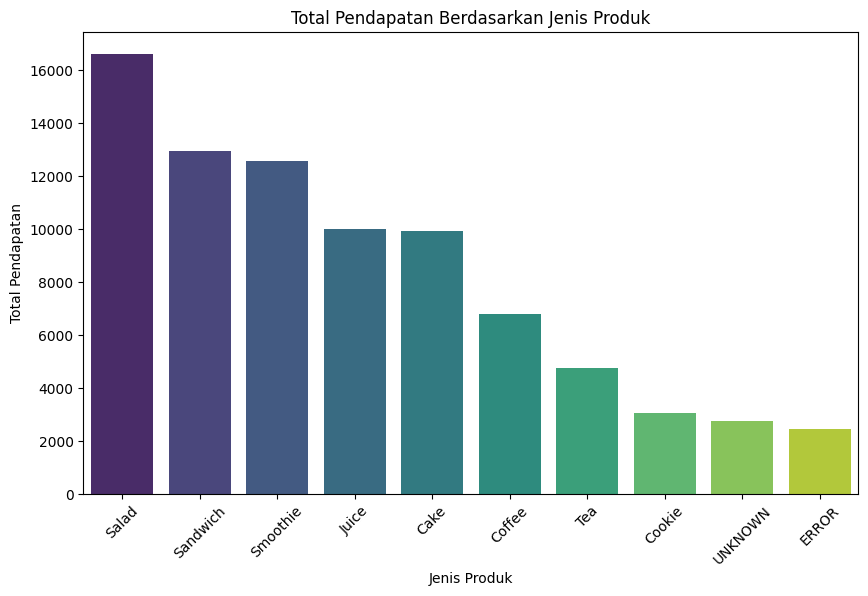

In [ ]:
penjualan_item = df.groupby('Item')['Total Spent'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=penjualan_item.index, y=penjualan_item.values, palette='viridis', hue=penjualan_item.index, legend=False)
plt.title('Total Pendapatan Berdasarkan Jenis Produk')
plt.xlabel('Jenis Produk')
plt.ylabel('Total Pendapatan')
plt.xticks(rotation=45)
plt.show()

Dari grafik batang di atas terlihat bahwa Salad adalah produk dengan total pendapatan tertinggi, jauh melampaui produk lainnya, di ikuti oleh Sandwich dan smoothie. Ini dapat menjadi sinyal bagi manajemen kafe bahwa produk seperti Salad, Sandwich, dan Smoothie harus dijaga kualitas dan ketersediaannya  karena kontribusinya terhadap total omzet jauh lebih besar dibanding produk murah.

Di dalam grafik batang dapat terlihat ada dua produk bernama "UNKNOWN" dan ERROR, dua produk ini tidak perlu di pedulikan karena merupakan data yang belum bersih.

## **Composition/Komposisi**

Aktivitas: Melihat proporsi atau persentase penggunaan setiap metode pembayaran oleh pelanggan kafe.

Tujuan: Mengetahui metode pembayaran mana yang paling dominan digunakan pelanggan.

Visualisasi: Pie Chart (Grafik Lingkaran).

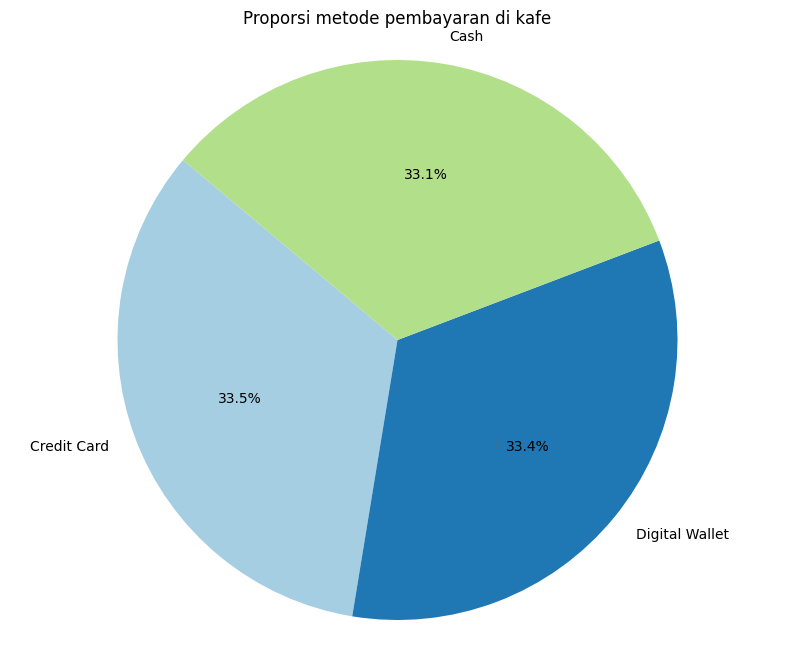

In [ ]:
payment_method = df.groupby('Payment Method')['Total Spent'].sum().sort_values(ascending=False)
payment_count = payment_method.head(3)

plt.figure(figsize=(10, 8))
payment_count.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proporsi metode pembayaran di kafe')
plt.ylabel('')
plt.axis('equal')
plt.show()

Pie chart di atas menunjukkan bahwa ketiga metode pembayaran, Digital Wallet (33,4%), Credit Card (33,5%), dan Cash (33,1%) memiliki presentase yang hampir sama persis. Tidak ada satu metode yang mendominasi secara signifikan.  Oleh karena itu kafe wajib memastikan ketiga metode pembayaran selalu tersedia dan berfungsi dengan baik, jika salah satu tidak bisa digunakan, kafe berpotensi kehilangan hampir sepertiga dari seluruh pelanggannya.

Aktivitas: Melihat persentase lokasi pelanggan setelah membeli produk.

Tujuan: Mengetahui lebih banyak pelanggan menikmati produk di dalam kafe (In-store) atau dibawa pulang (Takeaway).

Visualisasi: Pie Chart (Grafik Lingkaran).

## **Distribution/Distribusi**

Aktivitas: Menganalisis penyebaran nilai pengeluaran pada kolom Total Spent.

Tujuan: Melihat apakah mayoritas transaksi bernilai kecil atau besar, serta mendeteksi adanya kecondongan (skewness) dalam data pengeluaran pelanggan kafe.

Visualisasi: Histogram.

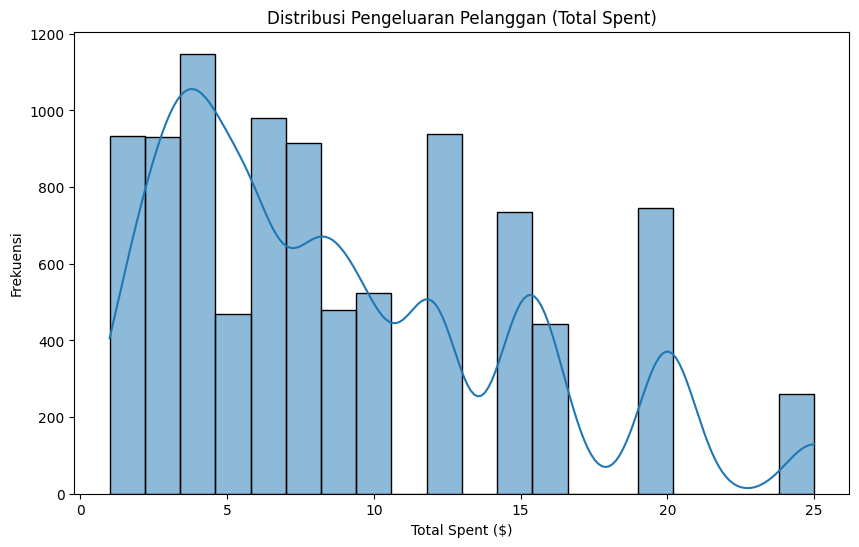

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Spent'], bins=20, kde=True)
plt.title('Distribusi Pengeluaran Pelanggan (Total Spent)')
plt.xlabel('Total Spent ($)')
plt.ylabel('Frekuensi')
plt.show()

Sebagian besar transaksi pelanggan berada pada nilai pengeluaran rendah hingga menengah (sekitar 2–10), yang menunjukkan bahwa mayoritas pelanggan melakukan pembelian dalam jumlah kecil atau secukupnya. Distribusi terlihat miring ke kanan (right-skewed), karena hanya sedikit transaksi dengan nilai tinggi (sekitar 15–25). Hal ini berarti transaksi besar memang ada, tetapi jumlahnya jauh lebih sedikit dibanding transaksi biasa,

## **Relationship/Hubungan**

Aktivitas: Menganalisis korelasi antara jumlah item yang dibeli (Quantity) dengan total pengeluaran pelanggan (Total Spent).

Tujuan: Mengetahui apakah peningkatan jumlah item yang dibeli selalu berbanding lurus dengan peningkatan total pengeluaran, serta mengidentifikasi seberapa kuat hubungan antara kedua variabel tersebut.

Visualisasi: Heatmap.

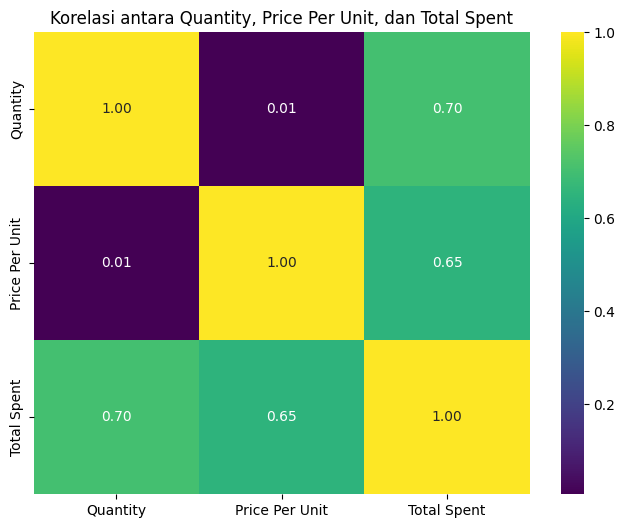

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=df[['Quantity', 'Price Per Unit', 'Total Spent']].corr(),
            annot=True,
            cmap='viridis',
            fmt='.2f')
plt.title('Korelasi antara Quantity, Price Per Unit, dan Total Spent')
plt.show()

Dari heatmap ini, dapat disimpulkan:
- Quantity - Total Spent (0.70):  Korelasinya cukup positif, artinya semakin banyak item yang dibeli pelanggan, semakin besar pula total pengeluarannya.
- Price Per Unit - Total Spent (0.65):  Korelasinya cukup positif, artinya produk dengan harga lebih tinggi berkontribusi lebih besar terhadap total pengeluaran.
- Quantity - Price Per Unit (0.01): Korelasinya sangat lemah bahkan hampir nol, Artinya harga produk tidak mempengaruhi berapa banyak item yang dibeli pelanggan. Pelanggan membeli produk mahal dan murah dalam jumlah yang sama.

# **DATA PREPARATION**

## **Incosistent Values**

Pada tahap ini, kita akan menangani nilai "ERROR", "nan" dan "UNKNOWN" yang tersebar di semua kolom, terkecuali Transaction ID. Nilai-nilai ini bukan missing values asli (bukan benar-benar kosong), melainkan teks tidak valid yang sengaja tertulis di dataset.

Baris yang mengandung "ERROR", "nan" atau "UNKNOWN" akan langsung dihapus.

1. **Menghapus Incosisten Values pada kolom Item**

In [ ]:
df = df[df['Item'] != 'ERROR']

In [ ]:
df = df[df['Item'] != 'UNKNOWN']


In [ ]:
df = df[df['Item'] != 'nan']


In [ ]:
df.describe(include='all')

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,9364,9031,9240,9199,9206,6952,6315,9215
unique,9364,8,7,8,19,5,4,367
top,TXN_6170729,Juice,5,3.0,6.0,Digital Wallet,In-store,UNKNOWN
freq,1,1171,1896,2275,910,2147,2832,149


Setelah baris yang mengandung "ERROR", "UNKNOWN", dan "nan" pada kolom Item dihapus, terlihat bahwa jumlah data (count) pada kolom Item berkurang dari yang awalnya 9.667 menjadi 9.031 baris. Kolom Item kini hanya memiliki 8 nilai unik yang semuanya merupakan nama produk valid seperti Juice, Coffee, Cake, dan lainnya. Produk yang paling sering muncul adalah Juice dengan frekuensi 1.137 transaksi, menandakan Juice adalah produk terlaris di kafe ini.


2. **Menghapus Incosisten Values pada kolom Quantity**

In [ ]:
df = df[df['Quantity'] != 'ERROR']

In [ ]:
df = df[df['Quantity'] != 'nan']

In [ ]:
df = df[df['Quantity'] != 'UNKNOWN']

In [ ]:
df.describe(include='all')

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,9050,8732,8926,8890,8894,6730,6109,8910
unique,9050,8,5,8,19,5,4,367
top,TXN_6170729,Juice,5,3.0,6.0,Digital Wallet,In-store,UNKNOWN
freq,1,1137,1896,2213,879,2080,2746,143


Setelah baris yang mengandung "ERROR", "UNKNOWN", dan "nan" pada kolom Quantity dihapus, jumlah data bertambah bersih menjadi 8.926 baris pada kolom Quantity. Kolom ini kini hanya memiliki 5 nilai unik yaitu angka 1 sampai 5 yang semuanya valid sebagai jumlah pembelian item. Nilai yang paling sering muncul adalah 5 dengan frekuensi 1.896 transaksi, yang menunjukkan pelanggan kafe cenderung membeli dalam jumlah yang cukup banyak sekaligus.


3. **Menghapus Incosisten Values pada kolom Price Per Unit**



In [ ]:
df = df[df['Price Per Unit'] != 'ERROR']

In [ ]:
df = df[df['Price Per Unit'] != 'UNKNOWN']

In [ ]:
df = df[df['Price Per Unit'] != 'nan']

In [ ]:
df.describe(include='all')

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,8719,8417,8599,8559,8565,6476,5885,8584
unique,8719,8,5,6,19,5,4,367
top,TXN_6170729,Juice,5,3.0,6.0,Digital Wallet,In-store,UNKNOWN
freq,1,1093,1819,2213,847,2003,2650,140


Setelah baris yang mengandung "ERROR", "UNKNOWN", dan "nan" pada kolom Price Per Unit dihapus, kolom ini kini memiliki 8.559 baris data valid dengan 6 nilai unik yang semuanya merupakan harga produk yang sah. Harga yang paling sering muncul adalah 3.0 dengan frekuensi 2.213 transaksi, yang mengindikasikan bahwa produk dengan harga 3.0 adalah yang paling banyak terjual.

4. **Menghapus Incosisten Values pada kolom Total Spent**

In [ ]:
df = df[df['Total Spent'] != 'ERROR']

In [ ]:
df = df[df['Total Spent'] != 'UNKNOWN']

In [ ]:
df = df[df['Total Spent'] != 'nan']

In [ ]:
df.describe(include='all')

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,8435,8139,8320,8278,8281,6264,5695,8302
unique,8435,8,5,6,17,5,4,367
top,TXN_6170729,Coffee,5,3.0,6.0,Digital Wallet,In-store,UNKNOWN
freq,1,1055,1749,2140,847,1940,2564,136


Baris yang mengandung "ERROR", "UNKNOWN", dan "nan" pada kolom Total Spent berhasil dihapus. Jumlah data berkurang menjadi 8.281 baris. Kolom ini kini memiliki 17 nilai unik yang semuanya merupakan nilai total pengeluaran yang valid. Total pengeluaran yang paling sering muncul adalah 6.0 dengan frekuensi 847 transaksi, yang menunjukkan bahwa pengeluaran sebesar 6.0 adalah yang paling umum terjadi.


5. **Menghapus Incosisten Values pada kolom Payment Method**


In [ ]:
df = df[df['Payment Method'] != 'ERROR']

In [ ]:
df = df[df['Payment Method'] != 'UNKNOWN']

In [ ]:
df = df[df['Payment Method'] != 'nan']

In [ ]:
df.describe(include='all')

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,7944,7662,7835,7794,7799,5773,5393,7818
unique,7944,8,5,6,17,3,4,367
top,TXN_6170729,Coffee,5,3.0,6.0,Digital Wallet,In-store,UNKNOWN
freq,1,999,1639,2003,793,1940,2427,131


Baris yang mengandung "ERROR", "UNKNOWN", dan "nan" pada kolom Payment Method berhasil dihapus. Jumlah data berkurang menjadi 5.773 baris. Kolom ini kini hanya memiliki 3 nilai unik yang valid yaitu Cash, Credit Card, dan Digital Wallet. Metode pembayaran yang paling sering digunakan adalah Digital Wallet dengan frekuensi 1.940 transaksi, menandakan pelanggan kafe sudah banyak yang beralih ke pembayaran digital.


6. **Menghapus Incosisten Values pada kolom Location**

In [ ]:
df = df[df['Location'] != 'ERROR']

In [ ]:
df = df[df['Location'] != 'UNKNOWN']

In [ ]:
df = df[df['Location'] != 'nan']

In [ ]:
df.describe(include='all')

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,7386,7115,7285,7252,7250,5372,4835,7269
unique,7386,8,5,6,17,3,2,367
top,TXN_6170729,Juice,5,3.0,6.0,Digital Wallet,In-store,UNKNOWN
freq,1,933,1532,1857,735,1814,2427,122


Baris yang mengandung "ERROR", "UNKNOWN", dan "nan" pada kolom Location berhasil dihapus. Jumlah data berkurang menjadi 4.835 baris. Kolom ini kini hanya memiliki 2 nilai unik yang valid yaitu In-store dan Takeaway. Lokasi yang paling sering muncul adalah In-store dengan frekuensi 2.427 transaksi, yang berarti lebih banyak pelanggan yang memilih menikmati produk langsung di kafe dibandingkan dibawa pulang.


7. **Menghapus Incosisten Values pada kolom Transaction Date**

In [ ]:
df = df[df['Transaction Date'] != 'UNKNOWN']

In [ ]:
df = df[df['Transaction Date'] != 'ERROR']

In [ ]:
df = df[df['Transaction Date'] != 'nan']

In [ ]:
df.describe(include='all')

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,7155,6896,7055,7025,7028,5208,4676,7038
unique,7155,8,5,6,17,3,2,365
top,TXN_6170729,Juice,5,3.0,6.0,Digital Wallet,In-store,2023-06-30
freq,1,904,1483,1793,710,1760,2341,33


Baris yang mengandung "ERROR", "UNKNOWN", dan "nan" pada kolom Location berhasil dihapus. Jumlah data berkurang menjadi 7.038 baris.


8. **Mengubah tipe data pada kolom Quantity**

In [ ]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

In [ ]:
df['Quantity'] = df['Quantity'].astype('Int64')

Kolom Quantity dikonversi ke tipe numerik, kemudian diubah ke tipe Int64. Tipe Int64 dipilih karena jumlah item yang dibeli tidak mungkin berbentuk desimal.

9. **Mengubah tipe data pada kolom Price Per Unit**

In [ ]:
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')

In [ ]:
df['Price Per Unit'] = df['Price Per Unit'].astype('Float64')

Kolom Price Per Unit  dikonversi ke tipe numerik, kemudian diubah ke tipe Float64. Tipe float digunakan karena harga satuan produk kafe bisa berupa nilai desimal seperti 1.5.


10. **Mengubah tipe data pada kolom Total Spent**

In [ ]:
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

In [ ]:
df['Total Spent'] = df['Total Spent'].astype('Float64')

Kolom Total Spent dikonversi ke tipe numerik, kemudian diubah ke tipe Float64. Sama seperti Price Per Unit, kolom ini menggunakan float karena total pengeluaran per transaksi bisa menghasilkan nilai desimal.


11. **Mengubah tipe data pada kolom Transaction date**

In [ ]:
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], format="mixed")

Kolom Transaction Date dikonversi ke tipe datetime. Dengan tipe datetime, analisis tren penjualan berdasarkan bulan dan hari dapat dilakukan dengan mudah.


12. **Mengecek tipe data  yang telah diubah**

In [ ]:
df.dtypes

,0
Transaction ID,object
Item,object
Quantity,Int64
Price Per Unit,Float64
Total Spent,Float64
Payment Method,object
Location,object
Transaction Date,datetime64[ns]


Terlihat bahwa seluruh tipe data kini sudah sesuai dengan kebutuhan analisis. Quantity sudah bertipe Int64, Price Per Unit dan Total Spent sudah bertipe Float64, dan Transaction Date sudah bertipe datetime64. Kolom Transaction ID, Item, Payment Method, dan Location tetap bertipe object karena memang berisi teks.

## **Missing Values**

Pada tahap ini kita akan menangani data yang hilang. Berbeda dengan ERROR/UNKNOWN yang sudah dihapus, missing values di sini adalah baris yang benar-benar kosong (NaN asli) bukan hasil ketikan.

Disini saya akan menghapus kolom yang memiliki presentase missing vales dibawah 5%.


In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
Transaction ID,0.000000
Item,3.619846
Quantity,1.397624
Price Per Unit,1.816911
Total Spent,1.774983
Payment Method,27.211740
Location,34.647100
Transaction Date,1.635220


Jika di perhatikan, presentase missing values disini mengalami perubahan jika dibanding pengecekan missing values pada bagian VERIFIKASI KUALITAS DATA, hal ini dikarenakan kita telah menghapus nilai "ERROR", "UNKNOWN", dan "nan" sebelumnya, sehingga total baris nya berubah, dan hal ini juga merubah missing values terbaru.

1. **Item**

Missing values pada kolom Item dipilih untuk dihapus barisnya daripada diimputasi karena setiap item yang ada di kafe sudah memiliki harga tetapnya masing-masing, seperti Coffee seharga 2.0 dan Sandwich seharga 4.0, yang tercermin langsung di kolom Price Per Unit. Jika kolom Item yang kosong dipaksakan diisi menggunakan modus, maka nama item yang terisi belum tentu sesuai dengan harga yang sudah tercatat di Price Per Unit, sehingga akan menciptakan ketidakkonsistenan data antara kedua kolom tersebut. Terlebih lagi, persentase missing values pada kolom ini hanya sebesar 3%, yang berarti menghapus baris-baris ini tidak akan memberikan dampak yang signifikan terhadap analisis.

In [ ]:
df = df.dropna(subset=['Item'])

2. **Quantity**

Missing values pada kolom Quantity dipilih untuk dihapus karenakan kolom Quantity memiliki keterkaitan langsung dengan kolom Total Spent, dimana Total Spent sendiri merupakan hasil dari Quantity × Price Per Unit. Apabila nilai yang kosong pada kolom ini diisi menggunakan median atau mean, maka akan timbul ketidaksesuaian antara jumlah item yang tercatat dengan total pembayaran yang sudah ada, sehingga data menjadi tidak konsisten. Ditambah lagi missing values pada kolom ini hanya 1%, jumlah yang sangat kecil sehingga penghapusan baris tidak akan mempengaruhi hasil analisis.


In [ ]:
df = df.dropna(subset=['Quantity'])

3. **Price Per Unit**

Missing values pada kolom Price Per Unit dipilih untuk dihapus karenakan setiap produk yang dijual di kafe sudah memiliki harga yang baku dan tidak berubah. Mengisi nilai kosong pada kolom ini dengan median atau mean dari keseluruhan harga berpotensi menghasilkan nilai yang tidak sama dengan harga produk manapun, yang pada akhirnya akan menimbulkan inkonsistensi antara kolom Item, Price Per Unit, dan Total Spent secara bersamaan. Mengingat missing values pada kolom ini hanya sebesar 1%, sehingga dampak dari penghapusan baris ini terhadap analisis sangatlah minimal.

In [ ]:
df = df.dropna(subset=['Price Per Unit'])

4. **Total Spent**

Missing values pada kolom Total Spent dipilih untuk dihapus karena Total Spent sepenuhnya bergantung pada hasil perkalian Quantity × Price Per Unit, sehingga nilainya tidak bisa sembarangan ditebak atau diperkirakan. Mengisi kolom ini dengan mean atau median bisa membuat inkonsisten, yang tentu akan membuat analisis menjadi tidak akurat. Dengan missing values yang hanya 1%, penghapusan tidak akan terlalu berpengaruh.

In [ ]:
df = df.dropna(subset=['Total Spent'])

5. **Payment Method**


Kolom Payment Method dipilih untuk diimputasi menggunakan modus, dikarekan berbeda dengan kolom Item, Quantity, Price Per Unit, dan Total Spent yang saling terkait satu sama lain, kolom Payment Method berdiri sendiri dan tidak mempengaruhi perhitungan kolom manapun. Artinya mengisi nilai yang kosong pada kolom ini tidak akan menciptakan ketidakkonsistenan dengan kolom lain. Selain itu, missing values pada kolom ini cukup besar yaitu sekitar 27%, sehingga jika dihapus akan ada banyak baris yang hilang dan dapat mempengaruhi analisis tren metode pembayaran. Modus dipilih karena kolom ini bersifat kategorik sehingga tidak bisa menggunakan mean atau median, dan mengisi dengan metode pembayaran yang paling sering digunakan adalah asumsi yang paling masuk akal.


In [ ]:
df['Payment Method'] = df['Payment Method'].fillna(df['Payment Method'].dropna().mode()[0])

6. **Location**

Kolom Location dipilih untuk diimputasi menggunakan modus karena sama seperti Payment Method, kolom ini juga berdiri sendiri dan tidak memiliki ketergantungan perhitungan dengan kolom manapun, sehingga proses imputasi tidak akan mengganggu konsistensi data secara keseluruhan. Missing values pada kolom ini bahkan lebih besar yaitu sekitar 34%, yang berarti jika dihapus hampir sepertiga data akan hilang. Modus dipilih karena kolom ini hanya berisi dua nilai kategorik yaitu In-store dan Takeaway, sehingga mengisi dengan lokasi yang paling dominan adalah cara yang paling aman.


In [ ]:
df['Location'] = df['Location'].fillna(df['Location'].dropna().mode()[0])

7. **Transaction Date**

Missing values pada Transaction Date dipilih untuk dihapus dikarenakan tanggal transaksi adalah sesuatu yang sangat spesifik dan tidak bisa ditebak atau diperkirakan dengan metode apapun. Jika dipaksakan diisi menggunakan modus, maka akan banyak transaksi yang seolah-olah terjadi di tanggal yang sama, dan ini akan merusak analisis tren penjualan. Dengan missing values yang hanya 1%, menghapus baris-baris ini tidak akan memberikan dampak yang berarti pada dataset.

In [ ]:
df = df.dropna(subset=['Transaction Date'])

8. **Mengecek Missing Values**

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
Transaction ID,0.0
Item,0.0
Quantity,0.0
Price Per Unit,0.0
Total Spent,0.0
Payment Method,0.0
Location,0.0
Transaction Date,0.0


Setelah di cek, dapat dilihat bahwa missing values pada setiap kolom sudah bernilai 0.0 yang artinya sudah tidak terdapat missing values lagi.

## **Duplicated Values**

Data duplikat adalah baris yang isinya sama persis dengan baris lain. Duplikat dapat menyebabkan analisis menjadi tidak akurat karena satu transaksi bisa dihitung lebih dari sekali.

In [ ]:
df[df.duplicated()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date


Dataset ini tidak memiliki baris duplikat sama sekali. Oleh karena itu, tidak ada penanganan yang perlu dilakukan pada tahap ini.

## **Outliers Values**

Outlier adalah nilai yang sangat jauh menyimpang dari nilai data lainnya, Outlier bisa terjadi karena berbagai alasan seperti faktor kesalahan maupun kejadian lain yang tidak terduga.

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Quantity,0.000000
Price Per Unit,0.000000
Total Spent,2.669462


Outlier pada kolom Total Spent tidak perlu ditangani karena nilai tersebut masih masuk akal. Nilai tinggi pada Total Spent bisa terjadi karena pelanggan membeli item dalam jumlah banyak dengan harga yang tinggi, yang memang bisa saja terjadi. Jadi outlier di sini bukan merupakan kesalahan data, melainkan memang kondisi transaksi yang sebenarnya terjadi sehingga tidak perlu diubah atau dihapus.

# **CONSTRUCT DATA**

Pada dataset kafe ini, tidak ada kolom tambahan yang perlu dibuat. Seluruh tujuan analitik yang sudah ditetapkan sejak awal seperti mengidentifikasi produk dengan penghasilan terbanyak, membandingkan metode pembayaran, menganalisis perbandingan In-store vs Takeaway, dan korelasi antara Quantity dengan Total Spent, semuanya sudah bisa dijawab langsung menggunakan kolom-kolom yang tersedia tanpa perlu membuat kolom baru.   


Construct Data baru diperlukan ketika ada informasi yang tidak bisa didapatkan langsung dari kolom yang sudah ada dan benar-benar dibutuhkan untuk menjawab tujuan analitik. Sedangkan pada dataset ini, semua informasi yang dibutuhkan sudah tersedia, sehingga tidak ada alasan untuk membuat kolom tambahan. Membuat kolom baru tanpa kebutuhan yang jelas hanya akan membuat dataset menjadi lebih kompleks dari awalnya.

# **DATA REDUCTION**

Data Reduction adalah proses menghapus kolom yang tidak relevan dengan tujuan analisis agar dataset menjadi lebih sederhana dan bersih. Pada dataset ini, kolom yang perlu dihapus pada dataset ini adalah kolom Transaction ID.  


Kolom Transaction ID dihapus karena kolom ini hanya berperan sebagai kode unik pengenal setiap transaksi, yang berfungsi untuk membedakan satu transaksi dengan transaksi lainnya. Kolom ini tidak membawa informasi apapun yang bisa dianalisis atau divisualisasikan. Tidak ada satupun tujuan analitik yang membutuhkan kolom ini, sehingga keberadaannya di dataset ini tidak ada gunannnya. Oleh karena itu kolom ini lebih baik dihapus agar dataset menjadi lebih bersih.

In [ ]:
df = df.drop('Transaction ID', axis=1)

In [ ]:
print(df.columns)

Index(['Item', 'Quantity', 'Price Per Unit', 'Total Spent', 'Payment Method',
       'Location', 'Transaction Date'],
      dtype='object')


Setelah dicek dapat dilihat bahwa kolom Transaction ID sudah terhapus.